Search for :  a
Results limited to (1-100, 1 for defualt) : 1


https://gateway.marvel.com:443/v1/public/characters?nameStartsWith=a&limit=1&ts=034893&apikey=b429b36ad9c859671f28487a8acdca22&hash=274b17493ce651d54e028a1081b99320
1 items succeed!


Press ENTER to show results...("n" for no images): 




[Hero Name]:  A-Bomb (HAS) 
[MARVEL ID]: 1017100
[Description]:
 Rick Jones has been Hulk's best bud since day one, but now he's more than a friend...he's a teammate! Transformed by a Gamma energy explosion, A-Bomb's thick, armored skin is just as strong and powerful as it is blue. And when he curls into action, he uses it like a giant bowling ball of destruction! 


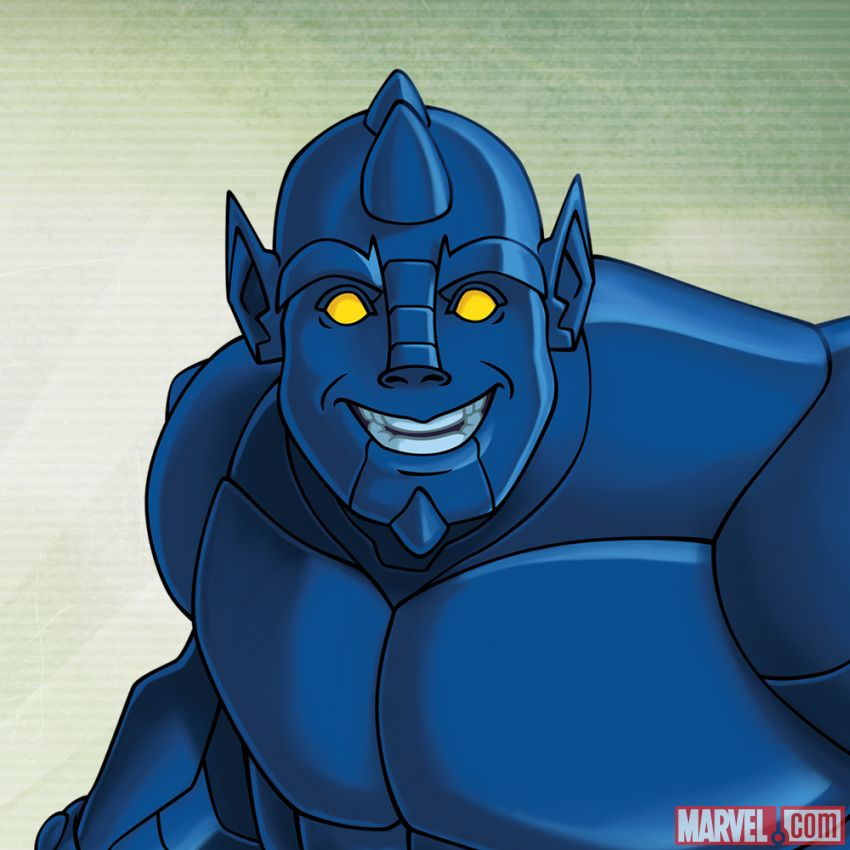

Photo:  http://i.annihil.us/u/prod/marvel/i/mg/3/20/5232158de5b16.jpg 
 ---------------


In [1]:
#首先把需要用的库引入进来
from urllib import request
from IPython.display import Image
import time
from hashlib import md5
import json

#获取Marvel所有英雄的基本数据（API）
#http://gateway.marvel.com/v1/public/comics?ts=1&apikey=1234&hash=ffd275c5130566a2916217b101f26150
#public key: b429b36ad9c859671f28487a8acdca22 
#private key: 10486b67a96262c7c4859f963ae11c36d94352e6

pbkey = 'b429b36ad9c859671f28487a8acdca22'
pvkey = '10486b67a96262c7c4859f963ae11c36d94352e6'


def hashkey(pvkey,pbkey):
    ts = str(time.time())[-6:]   #timestamp ts
    key = ts + pvkey + pbkey
    _md5key = md5(key.encode('utf-8')).hexdigest()
    return _md5key,ts

md5key,ts = hashkey(pvkey,pbkey)

while True:   
    name = input('Search for : ')
    if name == '':
        continue
    break
    
limit = input('Results limited to (1-100, 1 for defualt) :')
try:
    int(limit)
except:
    limit = "1"


url_allheros = "https://gateway.marvel.com:443/v1/public/characters?"\
                      "nameStartsWith="+name+"&limit="+limit+"&ts="+ts+"&apikey="+pbkey+"&hash="+md5key
print(url_allheros)
all_heros = request.urlopen(url_allheros)

#print(all_heros.read())
ah = all_heros.read()

all_heros_json = json.loads(ah)

#import pprint
#pprint.pprint(all_heros_json)
print(all_heros_json['data']['count'],'items succeed!')

if all_heros_json['data']['count'] != 0:
    
    n = input('Press ENTER to show results...("n" for no images):')
    print('\n')
   
        
    for hero in all_heros_json['data']['results']:
        print('[Hero Name]: ',hero['name'],'\n[MARVEL ID]:',hero['id'])
        des = hero['description']
        if des == '':
            des = 'None'
        print('[Description]:\n',des)
        img = hero['thumbnail']['path']+'.'+hero['thumbnail']['extension']
        if n != 'n':
            display(Image(img,width=300))
        print('Photo: ',img,'\n','---------------')